<a href="https://colab.research.google.com/github/joseHbernardino/Reconhecimento-de-placas/blob/main/Reconhecimento_de_placas_de_ve%C3%ADculos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor** : José Henrique Nunes Bernardino

**e-mail**: jose.bernardino@certsys.com.br

#  <a name="resumo"> RESUMO </a>

## Reconhecimento de placas de veículos


Um sistema de ANPR realiza o seguinte processo:

1. Detectar e localizar a placa presente na imagem de entrada (ou frame do vídeo)
2. Extrair o conteúdo da placa - ou seja, extrair as letras e números
3. Aplicar algum OCR para reconhecer os caracteres extraídos
4. Retornar o resultado (em forma de texto)

#  <a name="indice">  Índice </a>

* [Resumo](#resumo)
* [Índice](#indice)


#   <a name="bibliotecas">  Instalação de bibliotecas </a>

In [ ]:
!sudo apt install tesseract-ocr
!apt-get install tesseract-ocr-por
!pip install pytesseract 
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-por is already the newest version (4.00~git24-0e00fe6-1.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
mkdir: cannot create directory ‘tessdata’: File exists
--2022-03-08 01:41:15--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:4

#   <a name="Import">  Importando bibliotecas </a>

In [259]:
import cv2
import numpy as np
import imutils
import pytesseract
import requests
from matplotlib import pyplot as plt


In [260]:
#Função para mostrar imagem utilizando o MatplotLib

def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

#   <a name="Tratamento">  Tratamento da imagem </a>

In [292]:
#aquisição
f = open('Placa.jpg','wb')
response = requests.get('https://www.revendamais.com.br/blog/wp-content/uploads/2018/10/padrao-de-placa-do-Mercosul-1.jpg')
f.write(response.content)
f.close()
print("-------- Download successful --------")


img = cv2.imread('Placa.jpg')
(H, W) = img.shape[:2]
print(H, W)

-------- Download successful --------
443 846


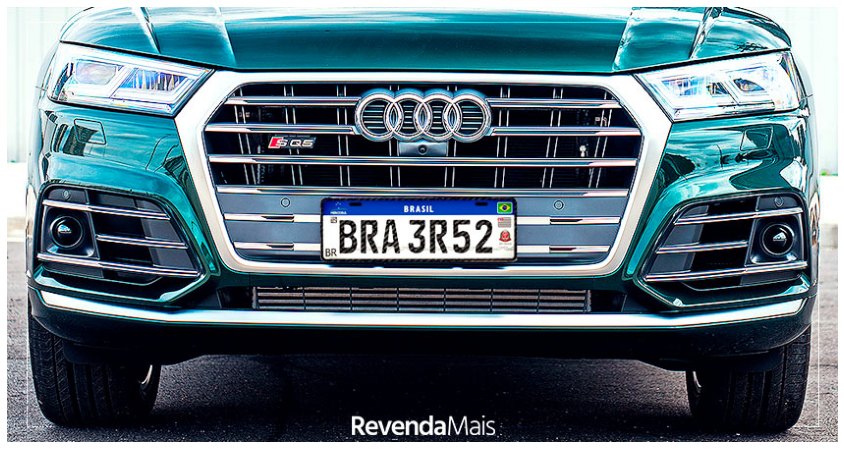

In [293]:
mostrar(img)

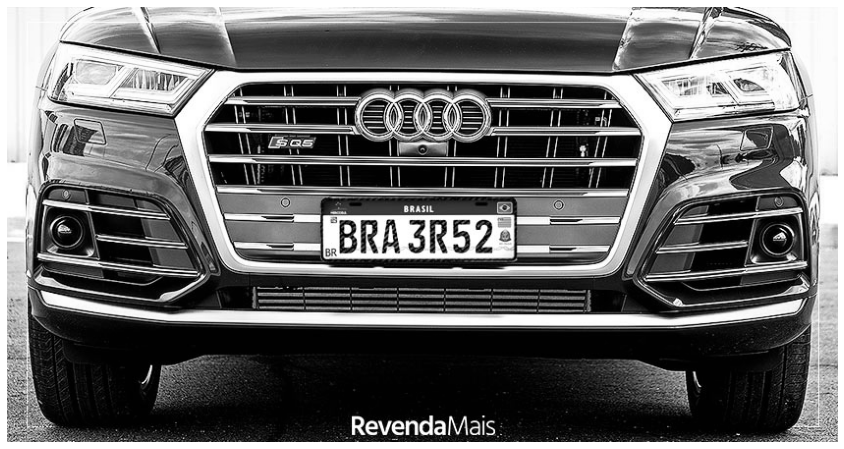

In [294]:
# Conversão imagem para tons de cinza (grayscale)


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mostrar(gray)

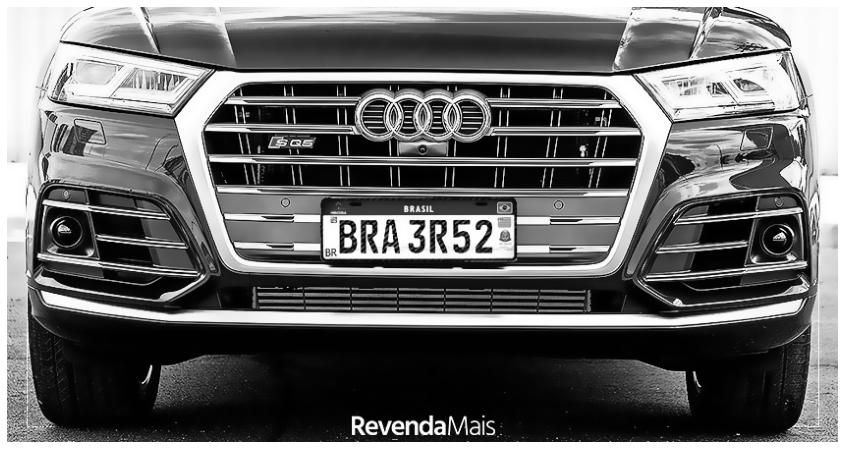

In [295]:
# Aplicando um desfoque ao fundo da imagem

blur = cv2.bilateralFilter(gray, 11, 17, 17)
mostrar(blur)

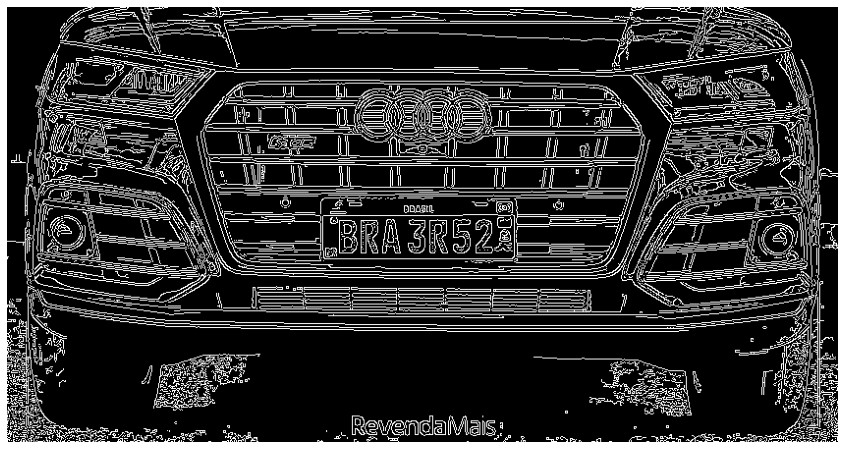

In [296]:
# Detecção de bordas e traçõs

border = cv2.Canny(blur, 30, 200)
mostrar(border)

In [297]:
# Detecção de contornos

conts = cv2.findContours(border.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8]

In [ ]:
conts

#   <a name="find">  Encontrar a região da placa </a>

In [299]:
localizacao = None

for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          localizacao = aprox
          break

In [300]:
localizacao

array([[[516, 212]],

       [[322, 212]],

       [[322, 255]],

       [[514, 256]]], dtype=int32)

In [301]:
mascara = np.zeros(gray.shape, np.uint8) 

In [302]:
mascara.shape

(443, 846)

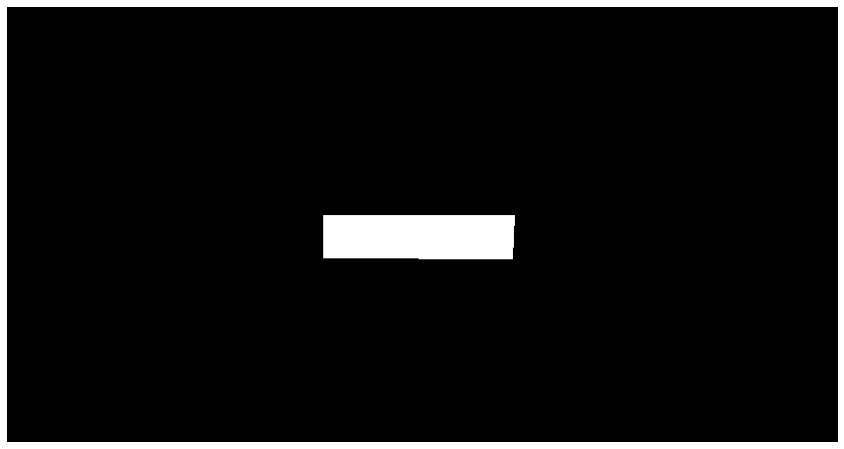

In [303]:
img_placa = cv2.drawContours(mascara, [localizacao], 0, 255, -1)
mostrar(mascara)

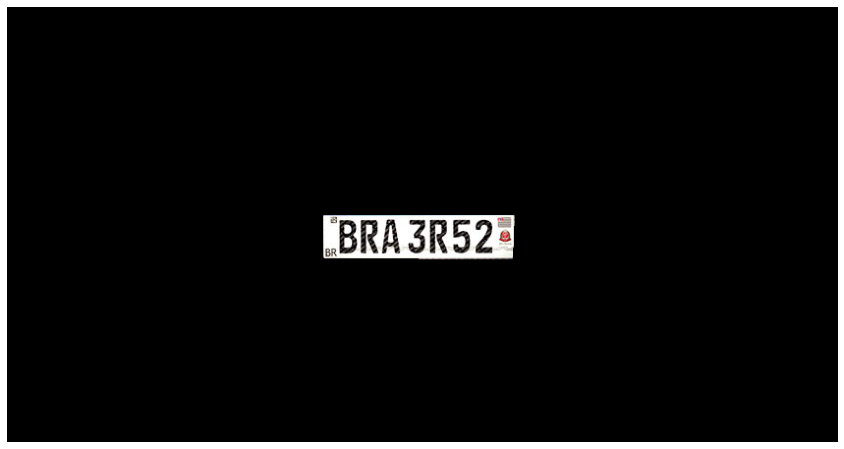

In [304]:
img_placa = cv2.bitwise_and(img, img, mask=mascara)
mostrar(img_placa)

In [305]:
(y, x) = np.where(mascara==255)
(inicioX, inicioY) = (np.min(x), np.min(y))
(fimX, fimY) = (np.max(x), np.max(y))

inicioX, inicioY, fimX, fimY

placa = gray[inicioY:fimY, inicioX:fimX]

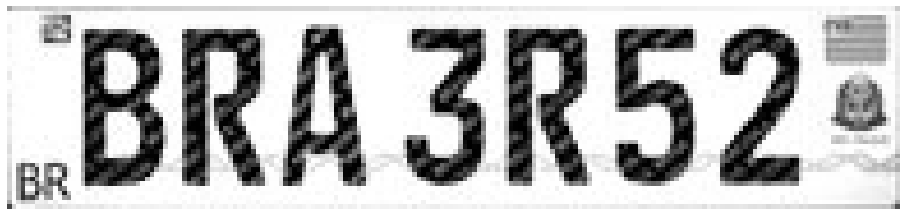

In [306]:
mostrar(placa)

#   <a name="Recom">  Reconhecimento da placa (OCR) </a>

In [307]:
!tesseract --list-langs

List of available languages (3):
osd
por
eng


In [308]:
config_tesseract = r'--tessdata-dir tessdata --psm 6'

In [309]:
texto = pytesseract.image_to_string(placa, lang="por", config=config_tesseract);

print(texto)

.BRA 3R52º



In [311]:
texto = "".join(caractere for caractere in texto if caractere.isalnum())
texto

'BRA3R52º'